In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv('data.csv',index_col = 'CensusTract')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

State   County  LILATracts_1And10  Urban  DP03_0006PE  DP03_0088E  \
CensusTract                                                                     
1001020100     AL  Autauga                  0      1          1.5    1.314721   
1001020200     AL  Autauga                  0      1          2.6    0.679560   
1001020300     AL  Autauga                  0      1          1.3    0.745571   
1001020400     AL  Autauga                  0      1          1.4    0.931093   
1001020500     AL  Autauga                  0      1          3.9    1.031156   

             DP03_0119PE  DP02_0006PE  P001003PE  P001004PE  P001005PE  \
CensusTract                                                              
1001020100           5.0          4.6  84.832636  11.349372   0.732218   
1001020200          10.7          2.1  40.921659  56.082949   0.230415   
1001020300           4.5          4.1  76.371183  19.181737   0.326119   
1001020400           4.9          3.5  93.160055   4.400365   0.250798   
1001020500           3.9          5.1  80.494148  13.347576   0.445848   

             P001006PE  P001007PE  P001008PE  P001009PE  DP03_UNEMPLOY  \
CensusTract                                                              
1001020100    0.732218   0.000000   0.732218   1.621339       3.724928   
1001020200    0.230415   0.000000   1.244240   1.290323       7.601351   
1001020300    0.504002   0.148236   1.037652   2.431070       5.573248   
1001020400    0.410397   0.091199   0.501596   1.185591       4.397394   
1001020500    2.749396   0.083597   0.835965   2.043470       3.453039   

             H004002PE  H004003PE  H004004PE  
CensusTract                                   
1001020100   53.391053  23.953824  22.655123  
1001020200   45.356662  17.765814  36.877524  
1001020300   57.722930  17.834395  24.442675  
1001020400   49.535424  29.268293  21.196283  
1001020500   49.069084  11.170995  39.759922

In [3]:
df.shape

(71642, 19)

In [4]:
urban = [ 'Urban' if x == 1 else 'Rural' for x in df['Urban']]
fooddesert = ['food desert' if x == 1 else 'non-food desert' for x in df['LILATracts_1And10']]
df['Urban'] = urban
df['LILATracts_1And10'] = fooddesert
rural = df[df['Urban'] != 'Urban'] 
urban = df[df['Urban'] == 'Urban'] 
df.head()

State   County LILATracts_1And10  Urban  DP03_0006PE  DP03_0088E  \
CensusTract                                                                    
1001020100     AL  Autauga   non-food desert  Urban          1.5    1.314721   
1001020200     AL  Autauga   non-food desert  Urban          2.6    0.679560   
1001020300     AL  Autauga   non-food desert  Urban          1.3    0.745571   
1001020400     AL  Autauga   non-food desert  Urban          1.4    0.931093   
1001020500     AL  Autauga   non-food desert  Urban          3.9    1.031156   

             DP03_0119PE  DP02_0006PE  P001003PE  P001004PE  P001005PE  \
CensusTract                                                              
1001020100           5.0          4.6  84.832636  11.349372   0.732218   
1001020200          10.7          2.1  40.921659  56.082949   0.230415   
1001020300           4.5          4.1  76.371183  19.181737   0.326119   
1001020400           4.9          3.5  93.160055   4.400365   0.250798   
1001020500           3.9          5.1  80.494148  13.347576   0.445848   

             P001006PE  P001007PE  P001008PE  P001009PE  DP03_UNEMPLOY  \
CensusTract                                                              
1001020100    0.732218   0.000000   0.732218   1.621339       3.724928   
1001020200    0.230415   0.000000   1.244240   1.290323       7.601351   
1001020300    0.504002   0.148236   1.037652   2.431070       5.573248   
1001020400    0.410397   0.091199   0.501596   1.185591       4.397394   
1001020500    2.749396   0.083597   0.835965   2.043470       3.453039   

             H004002PE  H004003PE  H004004PE  
CensusTract                                   
1001020100   53.391053  23.953824  22.655123  
1001020200   45.356662  17.765814  36.877524  
1001020300   57.722930  17.834395  24.442675  
1001020400   49.535424  29.268293  21.196283  
1001020500   49.069084  11.170995  39.759922

### Plotting the Aggregated Dataset

In [5]:
colors = ["#b8ca7d",'#f05682']
sns.set_palette(sns.color_palette(colors))

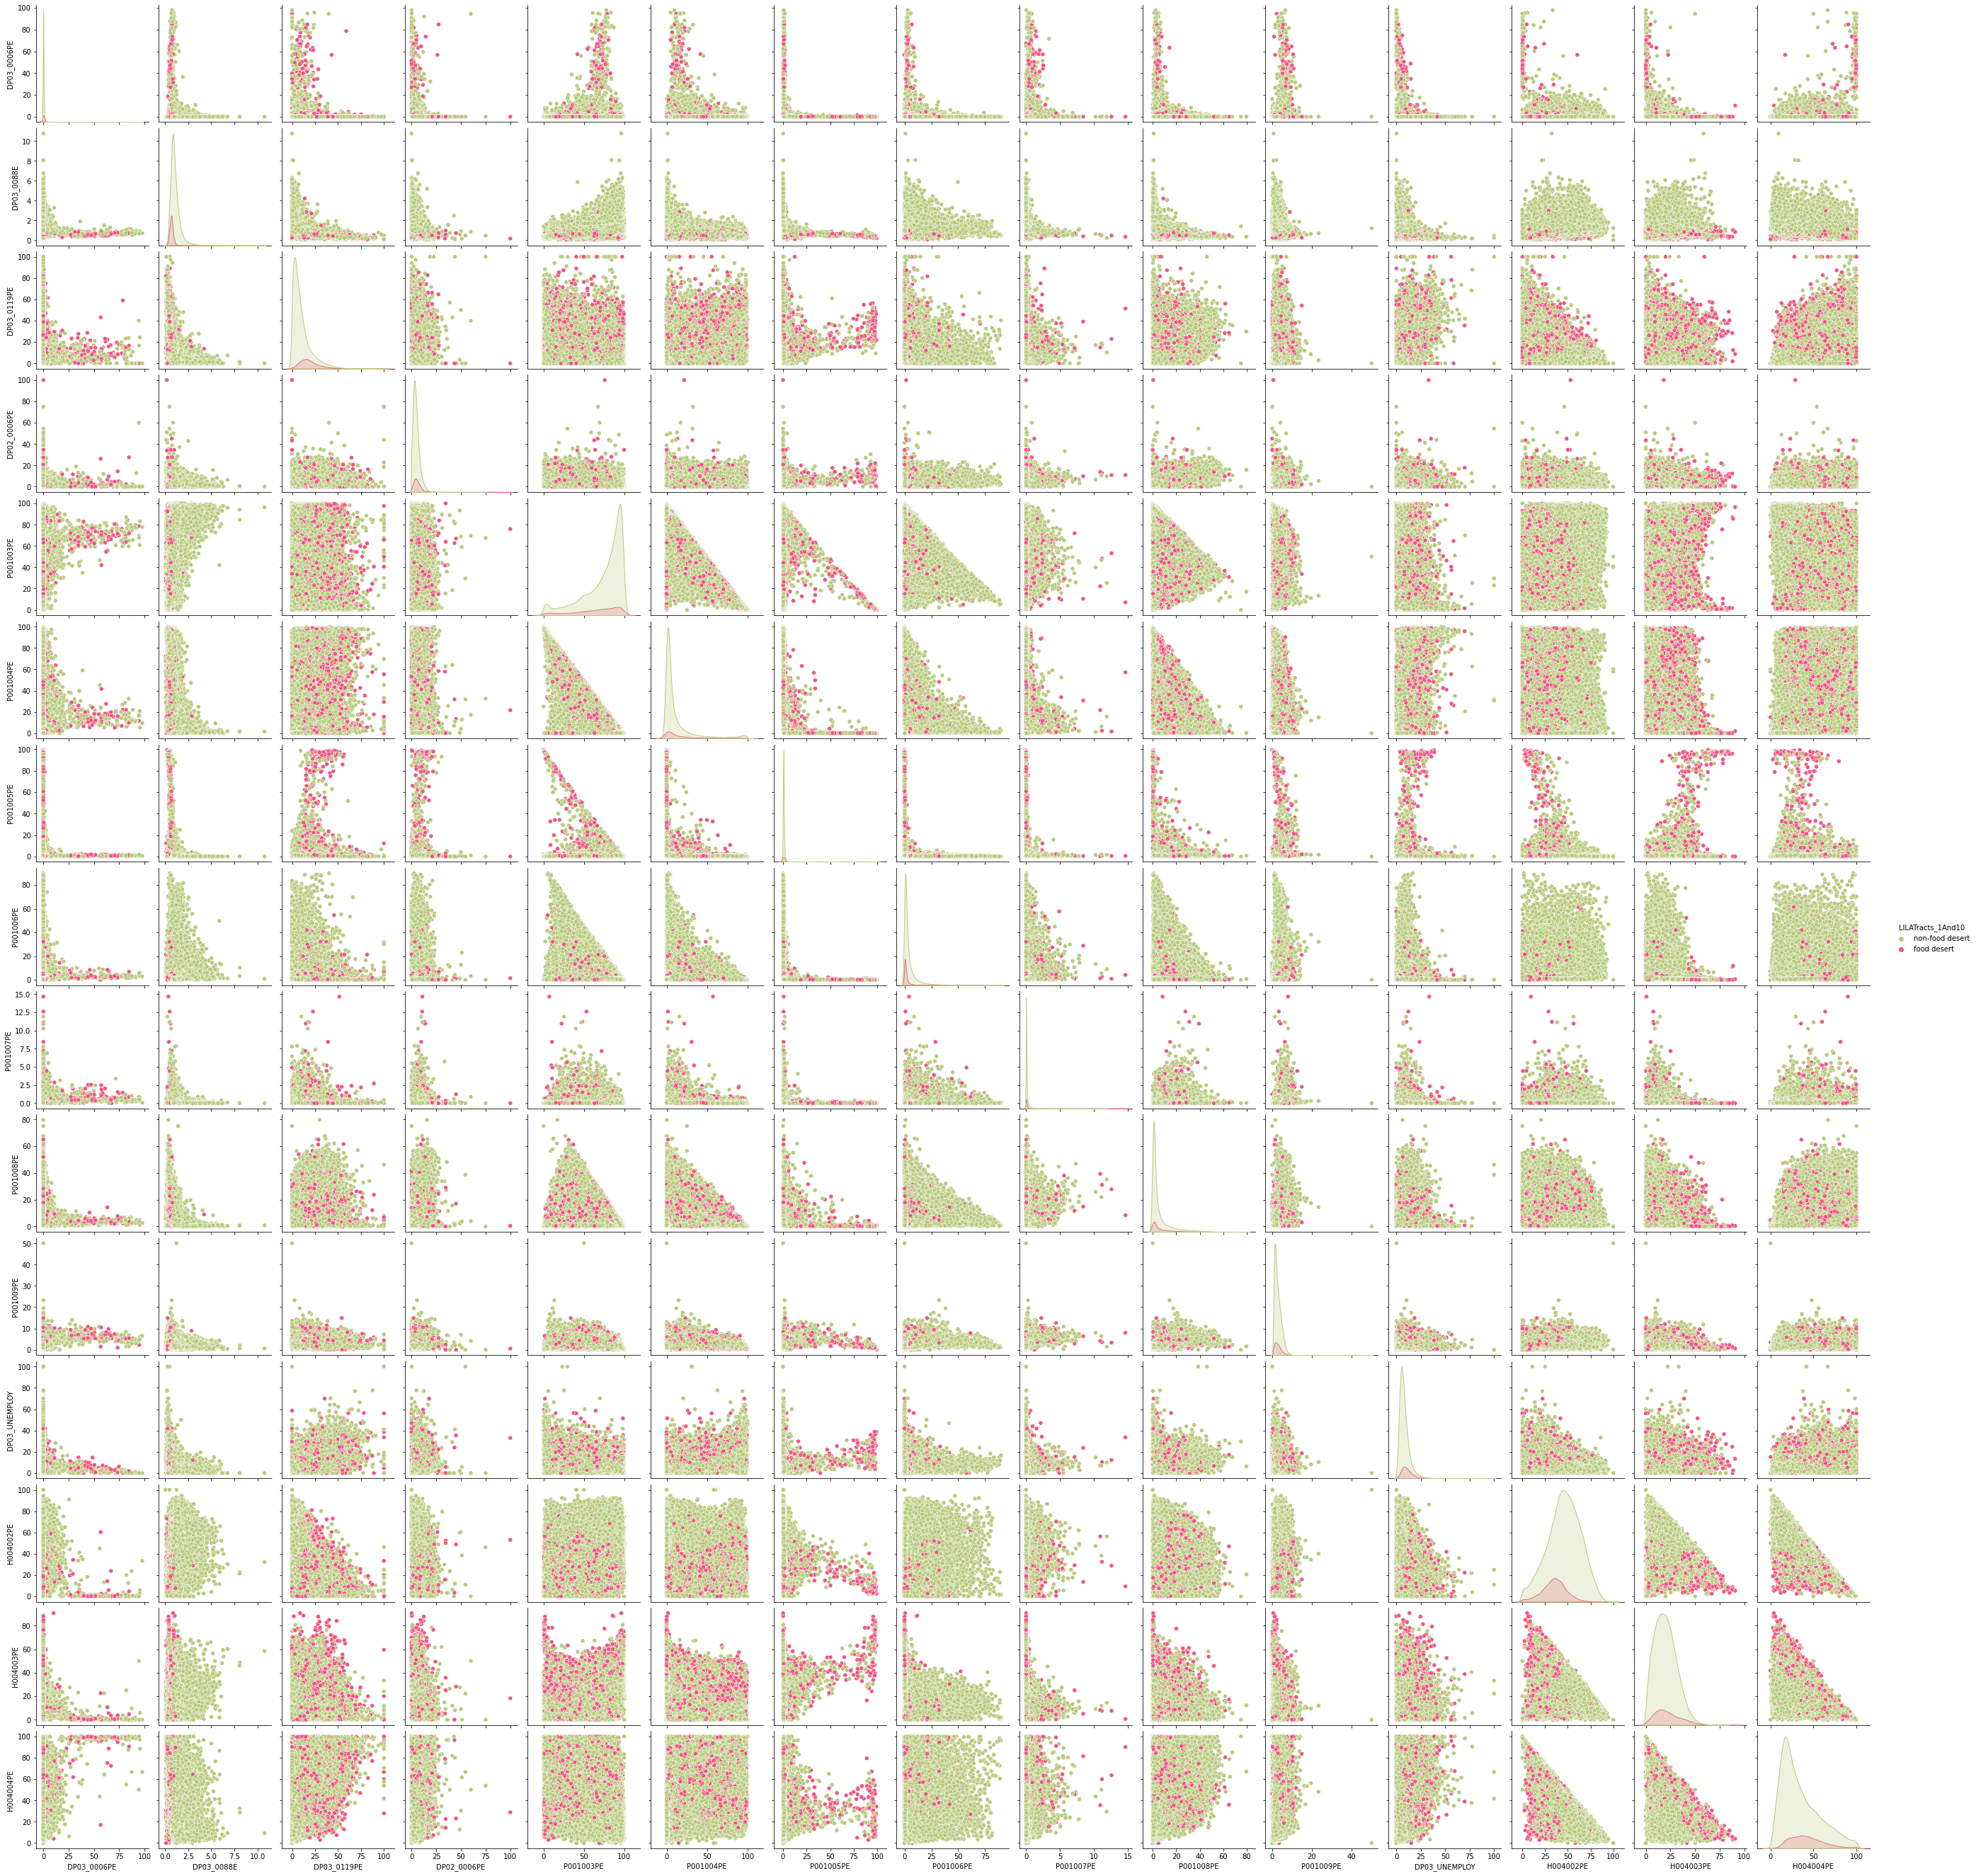

In [11]:
sns.pairplot(df, hue = 'LILATracts_1And10')

In [ ]:
for x in range(3,35):
    col = df.columns[x]
    fig = sns.displot(data = df, x = str(col),hue =  'LILATracts_1And10', kind = 'kde', fill = True )
    fig.savefig("{}.png".format(str(col)), dpi = 300, transparent = True)


### Data Analysis on Urban Dataframe

In [ ]:
sns.pairplot(urban, hue = 'LILATracts_1And10')

In [ ]:
for x in range(3,23):
    col = urban.columns[x]
    sns.displot(data = urban, x = str(col),hue =  'LILATracts_1And10', kind = 'kde', fill = True)

### Data Analysis on Rural DataFrame

In [ ]:
sns.pairplot(rural, hue = 'LILATracts_1And10')

In [ ]:
for x in range(3,23):
    col = rural.columns[x]
    sns.displot(data = rural, x = str(col),hue =  'LILATracts_1And10', kind = 'kde', fill = True)

### Miscellaneous - t-test

In [7]:
from scipy import stats

In [18]:
stats.ttest_ind(np.array(df[df['Urban']=='Urban']['P001004PE']),np.array(df[df['Urban']=='Rural']['P001004PE']))

Ttest_indResult(statistic=49.776144649590094, pvalue=0.0)

In [20]:
df[df['Urban']=='Urban']['P001004PE'].mean()

16.143564117584695

In [21]:
df[df['Urban']=='Rural']['P001004PE'].mean()

6.58379709816542

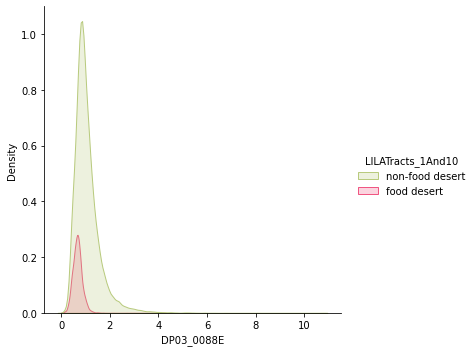

In [10]:
sns.displot(x= 'DP03_0088E',data = df,hue = "LILATracts_1And10", kind = 'kde',fill = True)
plt.savefig("displot_DP03_0088E", transparent = True, dpi = 300)